### 0030: Quantum Metrology

Quantum Metrology is an advanced field of study that explores the use of quantum phenomena to enhance measurement precision beyond the classical limits. This field leverages unique properties of quantum systems, such as superposition and entanglement, to achieve high-precision measurements. These techniques have the potential to revolutionize various scientific and technological domains, offering unprecedented accuracy in measuring time, fields, and other physical quantities.

In classical metrology, the precision of measurements is fundamentally limited by the Heisenberg uncertainty principle and shot noise. However, quantum metrology harnesses quantum entanglement and squeezing to overcome these limitations, pushing the boundaries of measurement accuracy. For instance, entangled particles can be used to perform interferometric measurements with a precision that scales better than the classical limit, known as the standard quantum limit.

One prominent application of quantum metrology is in the development of ultra-precise atomic clocks. These clocks use entangled atoms or ions to achieve timing accuracy far surpassing classical atomic clocks. This enhanced precision is crucial for technologies relying on precise timekeeping, such as GPS systems and synchronization of telecommunications networks.

Another significant application is in gravitational wave detection. Quantum-enhanced interferometers, such as those used in the LIGO and Virgo collaborations, utilize squeezed light to improve the sensitivity of the detectors, allowing for the detection of gravitational waves from distant cosmic events. This capability opens new avenues for astrophysical research and our understanding of the universe.

Quantum metrology also finds applications in fields like medical imaging and navigation systems. For example, quantum sensors can be used to create highly sensitive magnetometers, which have applications in medical diagnostics, such as detecting biomagnetic fields associated with neural activity. Similarly, quantum-enhanced gyroscopes can improve the precision of navigation systems, benefiting autonomous vehicles and aircraft.

The advantages of quantum metrology are evident in its potential to provide more accurate and sensitive measurements, which can lead to technological advancements and deeper scientific insights. As quantum technologies continue to evolve, the implementation of quantum metrology techniques is expected to expand, influencing various sectors and driving innovation.

Implementing quantum metrology requires sophisticated quantum control and readout techniques, often utilizing quantum circuits and algorithms. For instance, a typical quantum metrology experiment might involve preparing a quantum state, performing a series of quantum gates to create entanglement, and then measuring the outcome to extract precise information about the quantity being measured.

Quantum metrology represents a frontier of scientific research and technological development, pushing the limits of measurement precision through the use of quantum phenomena. Its applications span a wide range of fields, from timekeeping and navigation to medical diagnostics and fundamental physics research, promising to revolutionize how we measure and understand the world.

#### Quantum Phase Estimation for Quantum Metrology

Quantum metrology leverages quantum mechanics to enhance the precision of measurements. The Quantum Phase Estimation (QPE) algorithm is a crucial tool for estimating the eigenvalue (phase) of a unitary operator with high precision.

### Initialization
Prepare an equal superposition of states:
$$|\psi_0\rangle = \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} |k\rangle$$
where $n$ is the number of qubits used for phase estimation.

### Controlled Unitary Operations
Apply controlled unitary operations $CU^{2^k}$ to the system, where $k$ ranges from $0$ to $n-1$. The control qubit determines whether the unitary operator $U$ is applied to the target qubit.

### Inverse Quantum Fourier Transform (QFT)
Apply the inverse QFT to the control qubits. This maps the phase information encoded in the control qubits to the computational basis.

### Measurement
Measure the control qubits to obtain a binary representation of the estimated phase.

**[Insert a circuit diagram or reference to a standard QPE circuit]**

The precision of the phase estimation depends on the number of qubits used and the specific properties of the unitary operator. QPE has numerous applications in quantum metrology, including quantum sensing and metrology.


In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
from numpy import pi

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initialize the Aer simulator
simulator = AerSimulator()
statevector_simulator = StatevectorSimulator()

In [3]:
# Define a quantum circuit with 3 qubits and 3 classical bits for measurement
qc = QuantumCircuit(3, 3)

In [4]:
# Step 1: Prepare the initial state (Hadamard on the first qubit)
qc.h(0)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [5]:
# Step 2: Apply controlled-U operations (U is a rotation around the Z-axis)
qc.cp(pi/4, 0, 1)  # Controlled-U1 gate
qc.cp(pi/2, 0, 2)  # Controlled-U2 gate
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [6]:
# Step 3: Apply inverse QFT (Quantum Fourier Transform)
qc.h(2)
qc.cp(-pi/4, 1, 2)
qc.h(1)
qc.cp(-pi/2, 0, 2)
qc.cp(-pi/4, 0, 1)
qc.h(0)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [7]:
# Step 4: Measure all qubits
qc.measure([0, 1, 2], [0, 1, 2])

Quantum Circuit before compilation:


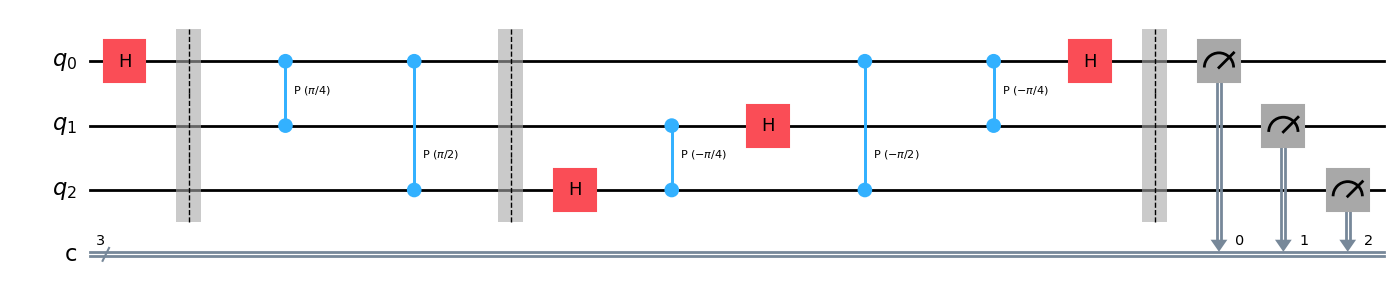

In [8]:
# Draw the quantum circuit before compilation
print("Quantum Circuit before compilation:")
qc.draw('mpl')
plt.show()

In [9]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)


Quantum Circuit after compilation:


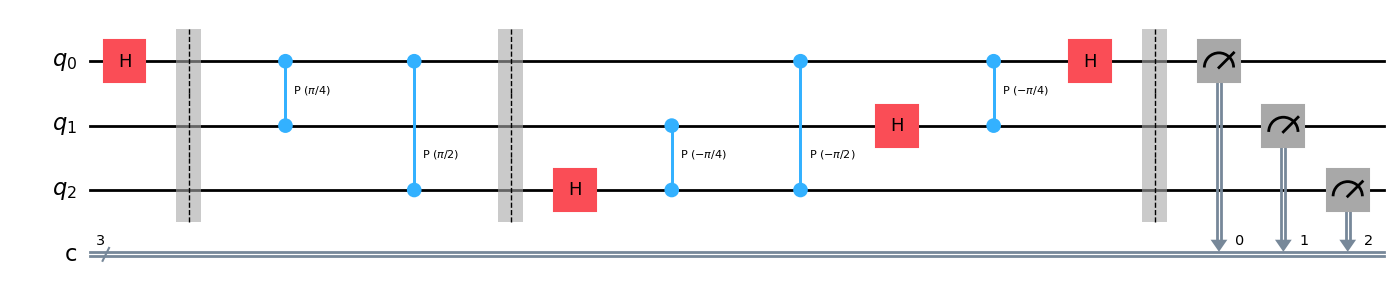

In [10]:
# Draw the quantum circuit after compilation
print("\nQuantum Circuit after compilation:")
compiled_circuit.draw('mpl')
plt.show()

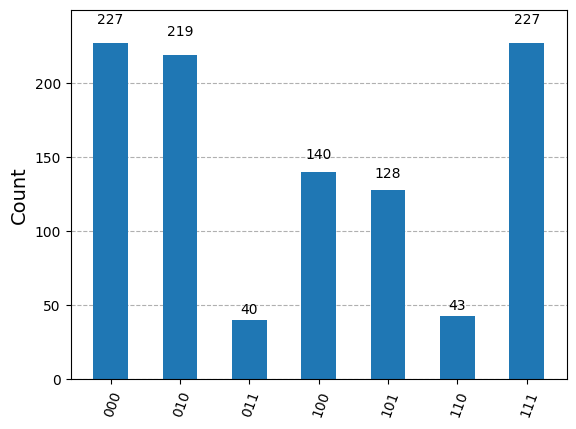

In [11]:
# Assemble the circuit for counts
qobj_counts = assemble(compiled_circuit, shots=1024)
result_counts = simulator.run(qobj_counts).result()
counts = result_counts.get_counts(compiled_circuit)
plot_histogram(counts)
plt.show()

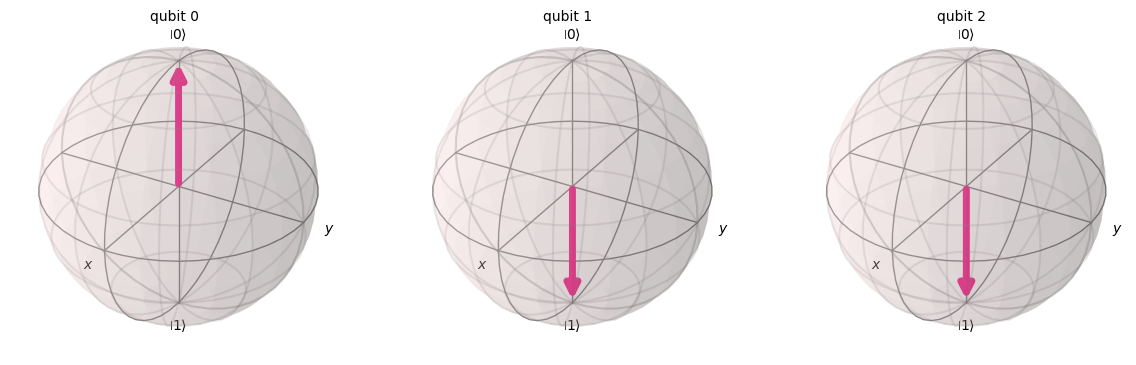

In [12]:
# Assemble the circuit for statevector
qobj_statevector = assemble(compiled_circuit)
result_statevector = statevector_simulator.run(qobj_statevector).result()
statevector = result_statevector.get_statevector(compiled_circuit)
plot_bloch_multivector(statevector)
plt.show()